Name: Mohammad Hosseinipour

Applying PCA on IRIS dataset

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns

In [28]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [29]:
iris.data.shape

(150, 4)

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

In [30]:
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])
def converter(specie):
    if specie == 0:
        return 'setosa'
    elif specie == 1:
        return 'versicolor'
    else:
        return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [31]:
iris_df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

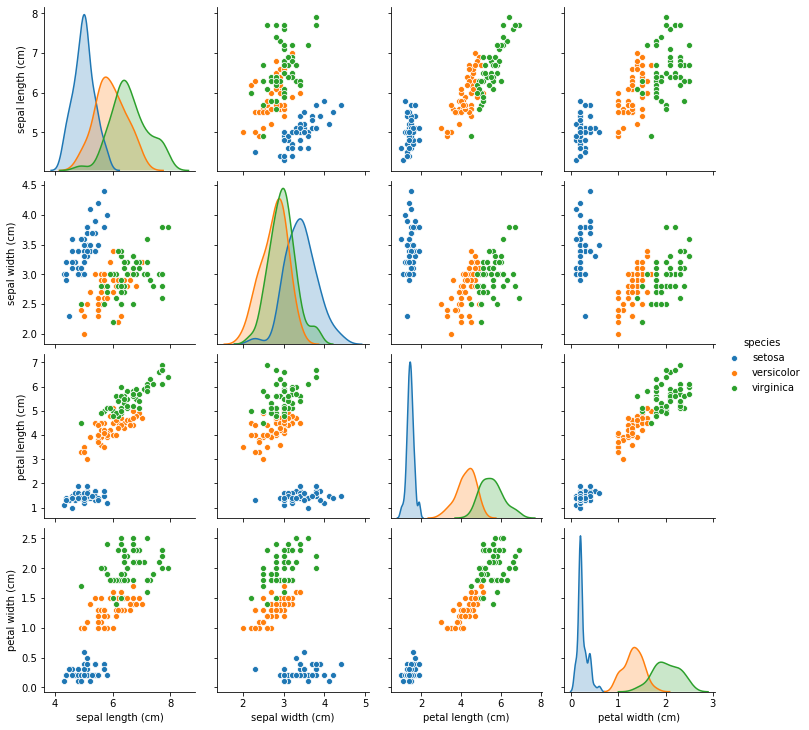

In [32]:
sns.pairplot(iris_df, hue= 'species')

Applying PCA with different components:

PCA, Components:1

In [24]:
X_reduced = PCA(n_components=1).fit_transform(iris.data)
iris_df = pd.DataFrame(data= X_reduced, columns= ["PCA feature"])
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

PCA feature    species
0      -2.684126     setosa
1      -2.714142     setosa
2      -2.888991     setosa
3      -2.745343     setosa
4      -2.728717     setosa
..           ...        ...
145     1.944110  virginica
146     1.527167  virginica
147     1.764346  virginica
148     1.900942  virginica
149     1.390189  virginica

[150 rows x 2 columns]

In [25]:
iris_df.describe()

PCA feature
count  1.500000e+02
mean  -2.812565e-15
std    2.056269e+00
min   -3.223804e+00
25%   -2.530348e+00
50%    5.546193e-01
75%    1.550143e+00
max    3.795645e+00

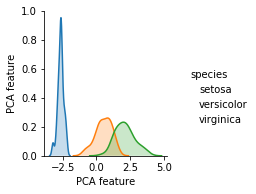

In [26]:
sns.pairplot(iris_df, hue= 'species')

PCA, Components:2

In [34]:
X_reduced = PCA(n_components=2).fit_transform(iris.data)
iris_df = pd.DataFrame(data= X_reduced, columns= ["1st PCA feature","2nd PCA feature"])
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

1st PCA feature  2nd PCA feature    species
0          -2.684126         0.319397     setosa
1          -2.714142        -0.177001     setosa
2          -2.888991        -0.144949     setosa
3          -2.745343        -0.318299     setosa
4          -2.728717         0.326755     setosa
..               ...              ...        ...
145         1.944110         0.187532  virginica
146         1.527167        -0.375317  virginica
147         1.764346         0.078859  virginica
148         1.900942         0.116628  virginica
149         1.390189        -0.282661  virginica

[150 rows x 3 columns]

In [35]:
iris_df.describe()

1st PCA feature  2nd PCA feature
count     1.500000e+02     1.500000e+02
mean     -2.812565e-15    -8.929894e-16
std       2.056269e+00     4.926162e-01
min      -3.223804e+00    -1.265971e+00
25%      -2.530348e+00    -3.254152e-01
50%       5.546193e-01    -2.215678e-02
75%       1.550143e+00     3.249152e-01
max       3.795645e+00     1.374165e+00

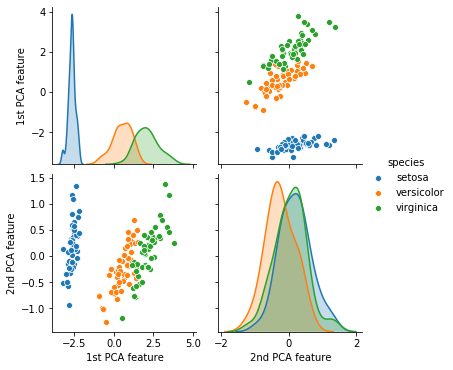

In [36]:
sns.pairplot(iris_df, hue= 'species')

PCA, Components:3

In [39]:
X_reduced = PCA(n_components=3).fit_transform(iris.data)
iris_df = pd.DataFrame(data= X_reduced, columns= ["1st PCA feature","2nd PCA feature","3rd PCA feature"])
iris_df = pd.concat([iris_df, target_df], axis= 1)
iris_df

1st PCA feature  2nd PCA feature  3rd PCA feature    species
0          -2.684126         0.319397        -0.027915     setosa
1          -2.714142        -0.177001        -0.210464     setosa
2          -2.888991        -0.144949         0.017900     setosa
3          -2.745343        -0.318299         0.031559     setosa
4          -2.728717         0.326755         0.090079     setosa
..               ...              ...              ...        ...
145         1.944110         0.187532         0.177825  virginica
146         1.527167        -0.375317        -0.121898  virginica
147         1.764346         0.078859         0.130482  virginica
148         1.900942         0.116628         0.723252  virginica
149         1.390189        -0.282661         0.362910  virginica

[150 rows x 4 columns]

In [40]:
iris_df.describe()

1st PCA feature  2nd PCA feature  3rd PCA feature
count     1.500000e+02     1.500000e+02     1.500000e+02
mean     -2.812565e-15    -8.929894e-16    -3.090121e-16
std       2.056269e+00     4.926162e-01     2.796596e-01
min      -3.223804e+00    -1.265971e+00    -6.941468e-01
25%      -2.530348e+00    -3.254152e-01    -2.054996e-01
50%       5.546193e-01    -2.215678e-02     1.639215e-02
75%       1.550143e+00     3.249152e-01     1.758214e-01
max       3.795645e+00     1.374165e+00     7.601654e-01

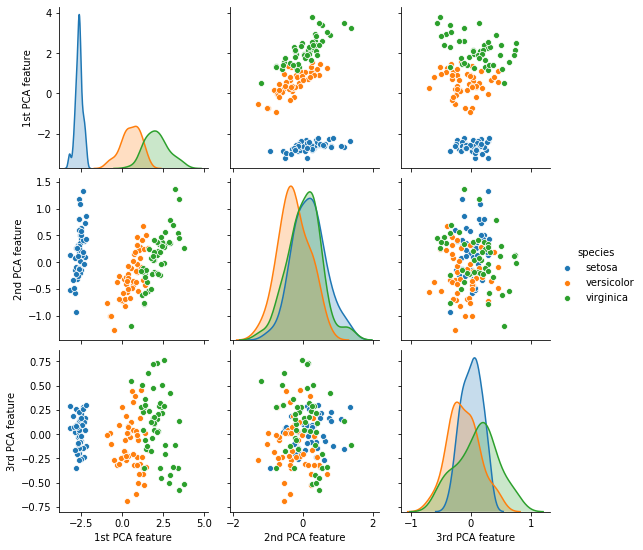

In [41]:
sns.pairplot(iris_df, hue= 'species')